# Robust statistics and Trimean

In [4]:
from scipy.stats import skewnorm
import numpy as np
import matplotlib.pyplot as plt

Let's generate some data that might be something we find in the real world.

In [11]:
skew_magnitude = -6
arr = skewnorm.rvs(skew_magnitude, loc=0, scale=1000, size=100000)

(The skew is a third-order [moment](https://en.wikipedia.org/wiki/Moment_(mathematics)).)

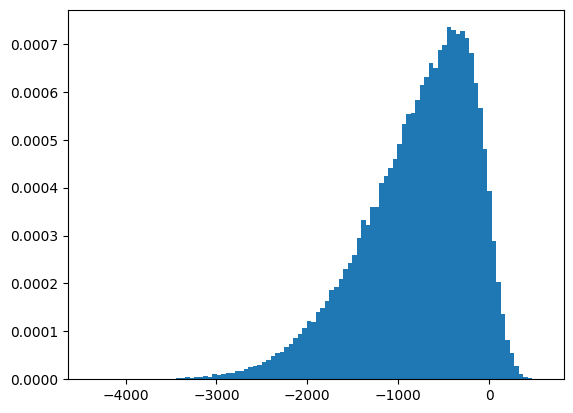

In [12]:
plt.hist(arr, bins=100, density=True)
plt.show()

Let's get a very common measure of central tendency:

In [14]:
np.mean(arr)

-789.5809069979605

The mean overstates the central tendency because of the skew.

The mean is defined as 

$$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$$

and treats all numbers equally. No matter how big or small.

One can "fix" this by looking at "robust" statistics that are often rank based.
Rank based means that we sort the data and then base our statistics on the rank of the data.
In this way, they are no longer sensitive to outliers.

In [15]:
def interquartile_range(arr):
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    return q3 - q1

print("Median", np.percentile(arr, 50))
print("Interquartile Range", interquartile_range(arr))
print("Mean", arr.mean())
print("Standard Deviation", arr.std())

Median -679.7024551978025
Interquartile Range 834.2816858677052
Mean -789.5809069979605
Standard Deviation 614.9363837309692


A very nice measure of centrality is the so-called [trimean](https://en.wikipedia.org/wiki/Trimean).

> "An advantage of the trimean as a measure of the center (of a distribution) is that it combines the median's emphasis on center values with the midhinge's attention to the extremes."
> 
> — Herbert F. Weisberg, Central Tendency and Variability

It is defined as

$$
\text{trimean} = \frac{Q_1 + 2Q_2 + Q_3}{4}
$$

where $Q_1$ is the first quartile, $Q_2$ is the median, and $Q_3$ is the third quartile.

In [18]:
def trimean(arr):
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    median = np.percentile(arr, 50)
    return (q1 + 2*median + q3)/4

print("Trimean", trimean(arr))

Trimean -708.4430042323374
